In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

## Exibir todo o grafico no jupyter
%matplotlib inline

In [30]:
df = pd.read_csv('height-weight.csv', delimiter=';')

In [31]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


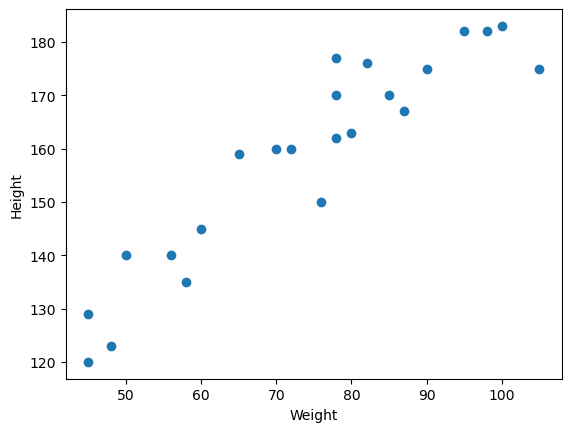

In [32]:
## Scatter plot

plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [33]:
## Correlação
df.corr() ## method=pearson - descobre a correlação entre suas colunas

,Weight,Height
Weight,1.000000,0.931427
Height,0.931427,1.000000


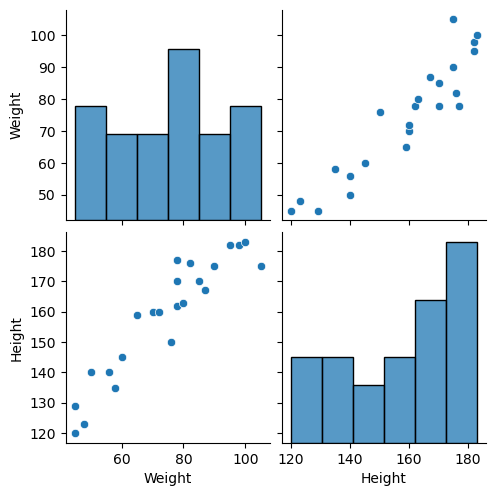

In [34]:
## Correlação com seaborn
plt.show(sns.pairplot(df))

In [35]:
# recursos(features) Independentes e dependentes

X = df[['Weight']] ## Independent feature deve ser um dataframe ou array bidimensional
y = df['Height']
type(X)
np.array(X).shape # (23,1) - Certo

(23, 1)

In [39]:
X_Series = df['Weight']
type(X_Series)
np.array(X_Series).shape # (23,) - Errado

(23,)

In [42]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
X_train.shape

(17, 1)

In [49]:
# Standardization - Normalização

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [51]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.31936706],
       [ 0.31936706],
       [-1.64947823],
       [ 1.33362069],
       [-0.45623866],
       [ 1.93024048]])

In [53]:
## Apply Simple Linear Regression

regression = LinearRegression(n_jobs=-1)

In [14]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [15]:
print(f'Corficiente: {regression.coef_[0]}')
print(f'Intercept: {regression.intercept_}')

Corficiente: 17.30486394129155
Intercept: 156.47058823529412


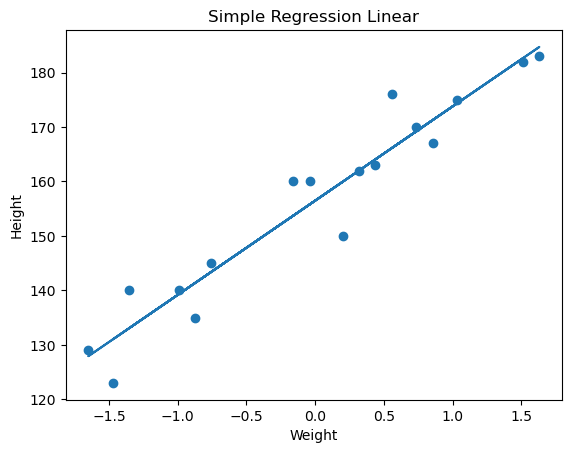

In [16]:
## Grafico
plt.scatter(X_train, y_train)
plt.title('Simple Regression Linear')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.plot(X_train, regression.predict(X_train))
plt.show()

# Prediction for test data
1. predicted height output = intercept + coef_*(Weight)
2. y_pred = 156.470 + 17.29(X_test)

In [18]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [19]:
## Performance Metrics

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.64175229311972
9.780198710842873
10.707088880415617


## Formula R^2

R^2 = 1 - SSR / SST

1. R^2 - Coeficiente deterministico
2. SSR - Somatoria das raizes residuais
3. SST - Somatoria total das raizes

In [21]:
score = r2_score(y_test, y_pred)
print(score)

0.7365398606733284


Adjusted R2 = 1 - [(1 - R2)*(n - 1)/(mn - k - 1)]

1. R2 - Modelo
2. n - numero de observações
3. k - numero de variaveus preditoras

In [23]:
## Displat adjusted R-Square
1 - (1 - score)*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

0.6706748258416606

In [26]:
## OLS Linear Regression
model = sm.OLS(y_train, X_train).fit()

In [30]:
prediction = model.predict(X_test)
print(prediction)

[  5.52660354   5.52660354 -28.54399629  23.07812466  -7.89514791
  33.40254885]


In [31]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1955
Date:                Tue, 11 Feb 2025   Prob (F-statistic):                       0.664
Time:                        08:31:46   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [32]:
## Prediction for new data 
regression.predict(scaler.transform([[72]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.80253726])